# Project Akhir Kecerdasan Bisnis

# CLUSTERISASI DATA PARIWISATA FASILITAS PROVINSI JAWA TIMUR MENGGUNKAN METODE K-MEANS (STUDI KASUS : BADAN PUSAT STATISTIK PROVINSI JAWA TIMUR)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/illiyarosida/datakb/main/kbfix.csv')
df.head(38)

,KabupatenKota,Akomodasi Accommodations,Kamar Rooms,Tempat Tidur\nBeds,Hotel,Total Pariwisata,rumah makan,Biro Perjalanan,Cabang Biro Perjalanan,Agen Perjalanan
0,Pacitan,27,410,729,30,44,20,7,0,1
1,Ponorogo,48,818,1373,57,46,38,9,0,10
2,Trenggalek,12,292,517,14,47,29,2,1,31
3,Tulungagung,27,1088,1886,28,25,38,57,0,11
4,Blitar,8,189,325,13,21,43,8,0,39
5,Kediri,10,343,753,17,44,57,9,0,0
6,Malang,166,2052,4419,255,30,195,39,0,2
7,Lumajang,17,462,836,20,52,21,4,0,1
8,Jember,50,1667,3602,54,45,67,9,0,2
9,Banyuwangi,64,2000,4189,81,44,88,8,0,3


In [6]:
X = df.drop(columns=['KabupatenKota'])
X

,Akomodasi Accommodations,Kamar Rooms,Tempat Tidur\nBeds,Hotel,Total Pariwisata,rumah makan,Biro Perjalanan,Cabang Biro Perjalanan,Agen Perjalanan
0,27,410,729,30,44,20,7,0,1
1,48,818,1373,57,46,38,9,0,10
2,12,292,517,14,47,29,2,1,31
3,27,1088,1886,28,25,38,57,0,11
4,8,189,325,13,21,43,8,0,39
5,10,343,753,17,44,57,9,0,0
6,166,2052,4419,255,30,195,39,0,2
7,17,462,836,20,52,21,4,0,1
8,50,1667,3602,54,45,67,9,0,2
9,64,2000,4189,81,44,88,8,0,3


In [7]:
X = np.asarray(X)
print(X)

[[   27   410   729    30    44    20     7     0     1]
 [   48   818  1373    57    46    38     9     0    10]
 [   12   292   517    14    47    29     2     1    31]
 [   27  1088  1886    28    25    38    57     0    11]
 [    8   189   325    13    21    43     8     0    39]
 [   10   343   753    17    44    57     9     0     0]
 [  166  2052  4419   255    30   195    39     0     2]
 [   17   462   836    20    52    21     4     0     1]
 [   50  1667  3602    54    45    67     9     0     2]
 [   64  2000  4189    81    44    88     8     0     3]
 [   15   430   711    15    45    37     2     0     0]
 [   28   704  1205    29    31    48     4     1     0]
 [   96   647  2460    88    42    29     2     0     0]
 [ 1079  3750  5049   605    54    37     5     0     0]
 [   81  1884  4043   100    36   124   184     1     2]
 [  141  1572  4412   161    42    29     2     0     3]
 [   23   570  1610    27    32    21     8     0     0]
 [   13   299   606    11    47

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
print(kmeans.cluster_centers_)

[[3.12000000e+02 2.86737500e+03 5.64425000e+03 2.95125000e+02
  4.12500000e+01 1.61250000e+02 4.95000000e+01 1.25000000e-01
  1.75000000e+00]
 [1.89000000e+02 1.07730000e+04 2.77400000e+04 2.39000000e+02
  3.80000000e+01 7.90000000e+02 3.35000000e+02 0.00000000e+00
  9.00000000e+00]
 [2.45517241e+01 5.48172414e+02 1.06086207e+03 2.61724138e+01
  3.70344828e+01 3.19655172e+01 1.22413793e+01 2.06896552e-01
  6.34482759e+00]]


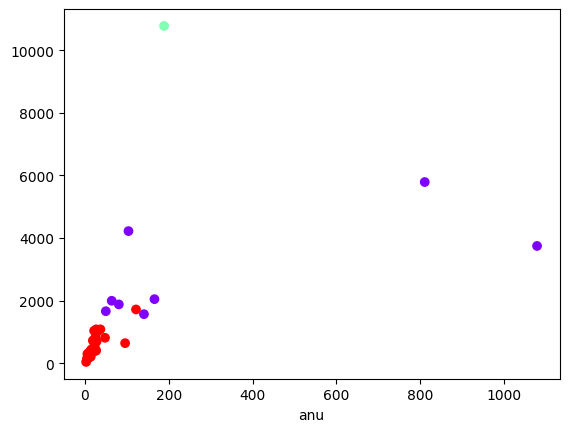

In [10]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('akomodasi')
plt.xlabel('anu')
plt.show()

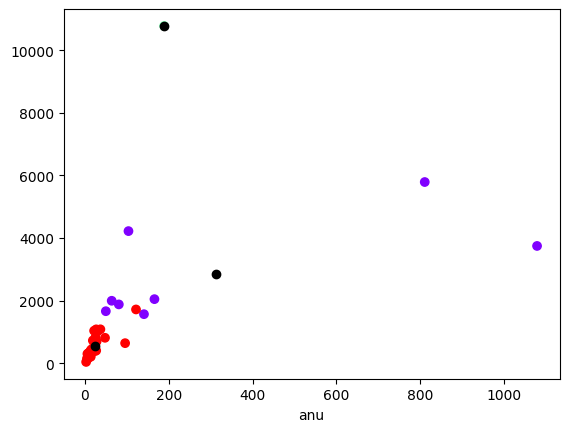

In [11]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  color='black')
plt.xlabel('akomodasi')
plt.xlabel('anu')
plt.show()